<a href="https://colab.research.google.com/github/snehilms/MachineLearning-DataScience_Projects/blob/main/Fashion_MNIST_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Keras and TensorFlow
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Loading the Data
fashion_mnist =keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test_full,y_test_full)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train=pd.DataFrame(X_train_full.reshape((60000,784)))
train
# It represent the grayscale pixels of images

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,41,188,103,54,48,43,87,168,133,16,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,49,136,219,216,228,...,244,240,243,214,224,162,0,2,0,0,0,0,0,0,0,0,0,1,0,0,139,146,130,135,135,137,125,124,125,121,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,118,24,0,0,0,0,0,48,88,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,100,212,205,...,106,102,75,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18,42,57,56,32,8,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,175,156,64,14,54,137,204,194,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,186,177,183,175,188,...,83,152,85,160,133,100,12,0,0,0,0,0,0,0,0,0,0,0,4,0,2,0,35,4,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,189,206,187,32,...,255,242,255,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,102,168,25,0,139,161,74,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,15,131,87,95,97,106,95,115,109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,67,252,...,232,144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,134,124,0,0,160,80,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,5,15,0,0,0,0,0,0,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,225,218,21,...,254,208,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,153,194,206,222,223,209,201,56,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,17,191,159,79,85,158,191,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,65,96,107,77,...,67,71,66,51,67,7,0,1,0,0,0,0,0,0,0,0,0,0,11,54,55,61,65,69,67,67,66,63,66,69,66,54,50,5,0,1,0,0,0,0


In [4]:
X_train_full[0].shape

(28, 28)

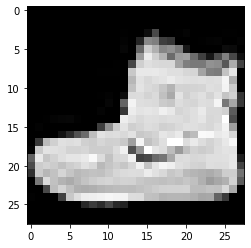

In [5]:
plt.imshow(X_train_full[0], cmap='gray')

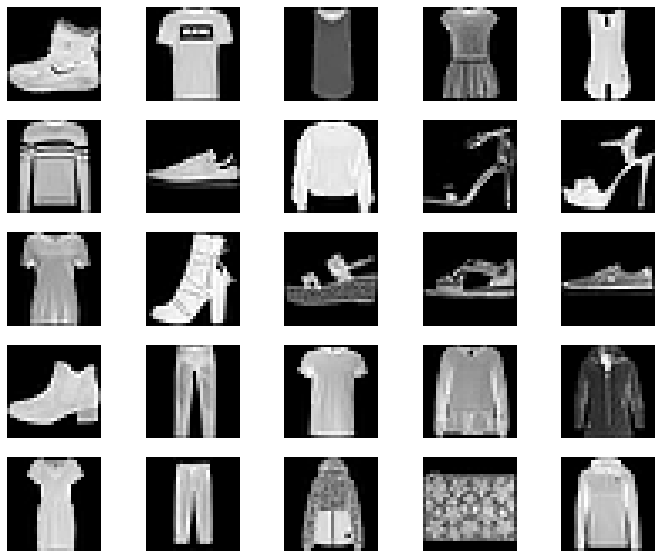

In [6]:
plt.figure(figsize=(12,10))
for i in range(0,25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train_full[i],cmap='gray')
  plt.axis('off')

In [7]:
y_train_full[0]# This representthe ankle boot

9

In [8]:
class_names_list=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

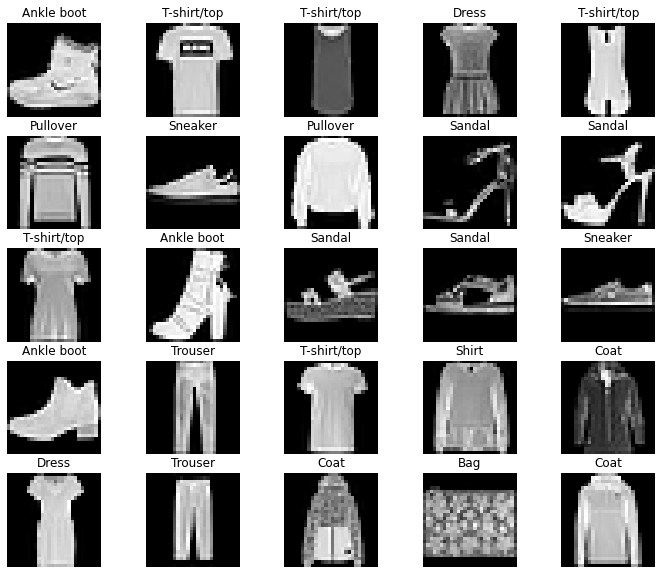

In [9]:
plt.figure(figsize=(12,10))
for i in range(0,25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train_full[i],cmap='gray')
  plt.title(class_names_list[y_train_full[i]])
  plt.axis('off')

In [10]:
X_train_full.shape[0]#These are the number of images

60000

In [33]:
X_train,X_test=X_train_full[:50000]/255.0,X_train_full[50000:]/255.0
y_train,y_test=y_train_full[:50000],y_train_full[50000:]

It is divided by 255 to normalise the data so that every value lies between 0-1

In [34]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [35]:
np.max(X_train)

1.0

In [36]:
np.min(X_train)

0.0

In [37]:
X_train.shape

(50000, 28, 28)

In [38]:
y_train.shape

(50000,)

In [39]:
#Neural Network Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential

In [40]:
#Creating the Model
model=Sequential()
model.add(Flatten(input_shape=[28,28]))#---Input
model.add(Dense(300,activation='relu'))#---Hidden 1
model.add(Dense(100,activation='relu'))#----Hidden 2
model.add(Dense(10,activation='softmax'))#---Output
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')
hist=model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 6s 2ms/step - loss: 0.6532 - val_loss: 0.4452
Epoch 2/10
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3911 - val_loss: 0.3990
Epoch 3/10
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3420 - val_loss: 0.3383
Epoch 4/10
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3141 - val_loss: 0.3466
Epoch 5/10
1250/1250 [==============================] - 2s 2ms/step - loss: 0.2930 - val_loss: 0.3528
Epoch 6/10
1250/1250 [==============================] - 2s 2ms/step - loss: 0.2753 - val_loss: 0.3245
Epoch 7/10
1250/1250 [==============================] - 2s 2ms/step - loss: 0.2652 - val_loss: 0.3369
Epoch 8/10
1250/1250 [==============================] - 2s 2ms/step - loss: 0.2543 - val_loss: 0.3031
Epoch 9/10
1250/1250 [==============================] - 2s 2ms/step - loss: 0.2388 - val_loss: 0.3203
Epoch 10/10
1250/1250 [==============================] - 2s 2ms/step - loss: 0.229

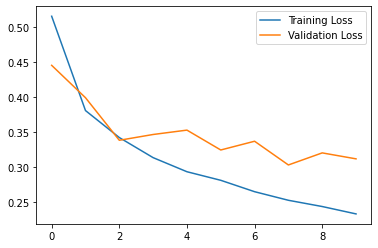

In [42]:
h=hist.history
plt.plot(h['loss'],label='Training Loss')
plt.plot(h['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

In [43]:
model2=Sequential()
model2.add(Flatten(input_shape=[28,28]))#---Input
model2.add(Dense(100,activation='relu'))#---Hidden 1
model2.add(Dense(100,activation='relu'))#----Hidden 2
model2.add(Dense(10,activation='softmax'))#---Output
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [53]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy' ,metrics='accuracy')
hist2=model2.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1705 - accuracy: 0.9351 - val_loss: 0.3879 - val_accuracy: 0.8863
Epoch 2/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1613 - accuracy: 0.9380 - val_loss: 0.4020 - val_accuracy: 0.8860
Epoch 3/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1619 - accuracy: 0.9385 - val_loss: 0.3626 - val_accuracy: 0.8992
Epoch 4/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1538 - accuracy: 0.9423 - val_loss: 0.3622 - val_accuracy: 0.8958
Epoch 5/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1430 - accuracy: 0.9445 - val_loss: 0.3790 - val_accuracy: 0.8881
Epoch 6/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1467 - accuracy: 0.9441 - val_loss: 0.3618 - val_accuracy: 0.8900
Epoch 7/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1383 - accuracy: 0.9459 - val_loss: 0.4222 - val_accuracy:

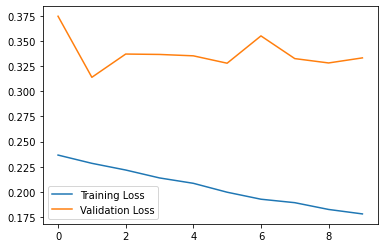

In [47]:
h=hist2.history
plt.plot(h['loss'],label='Training Loss')
plt.plot(h['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

In [70]:
y_pred=model.predict(X_test_full)

In [71]:
y_pred[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

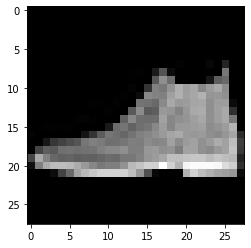

In [72]:
plt.imshow(X_test_full[0],cmap='gray')
plt.show()

In [73]:
y_pred[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

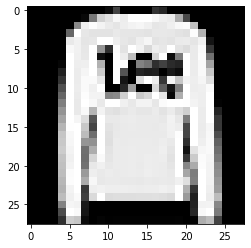

In [77]:
plt.imshow(X_test_full[1],cmap='gray')

In [78]:
y_pred[2]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

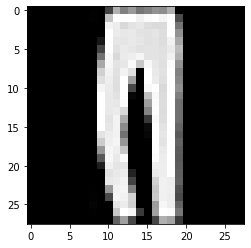

In [79]:
plt.imshow(X_test_full[2],cmap='gray')